In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import kid_readout.analysis.process_mmw_response

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [76]:
mmws = [kid_readout.analysis.process_mmw_response.MmwResponse('/data/readout/2016-01-08_151014_mmw_frequency_sweep.nc',k,data_is_aligned=True) for k in range(16)]

In [110]:
mmw = mmws[15]

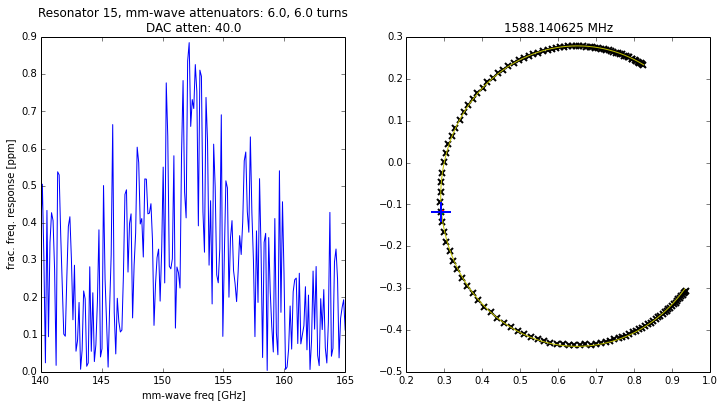

In [111]:
blah = mmw.plot()

In [112]:
mmw.measurement_freq

1588.140625

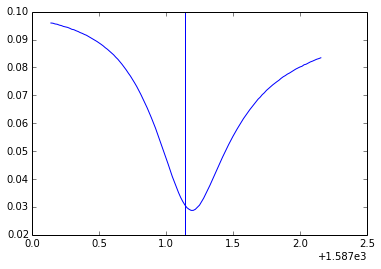

In [114]:
plot(mmw.sweep_freq,np.abs(mmw.sweep_s21))
gca().axvline(mmw.measurement_freq)

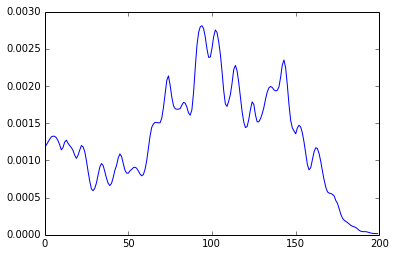

In [98]:
plot(mmw.zbd_voltage)

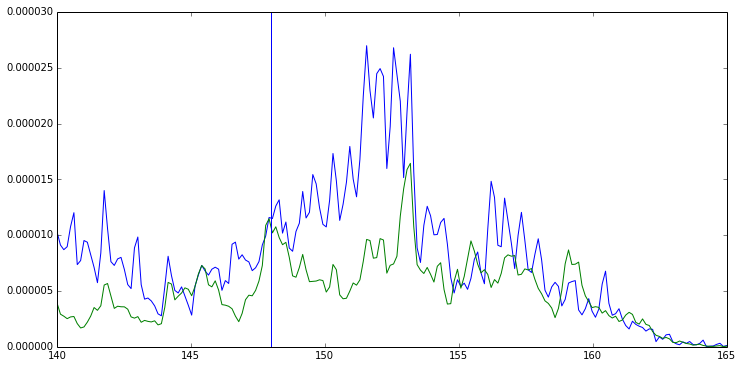

In [134]:
figure(figsize=(12,6))
m9 = mmws[1]
plot(m9.mmw_freq/1e9,(np.abs(m9.mmw_frac_response)))
m9 = mmws[9]
plot(m9.mmw_freq/1e9,(np.abs(m9.mmw_frac_response)))


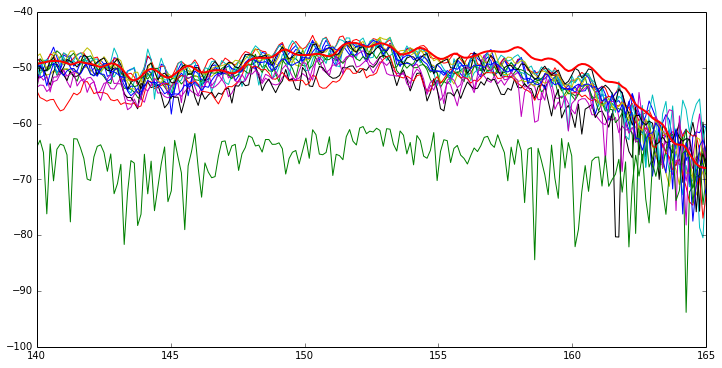

In [103]:
figure(figsize=(12,6))
for mmw in mmws:
    plot(mmw.mmw_freq/1e9,10*np.log10(np.abs(mmw.mmw_frac_response)))
plot(mmw.mmw_freq/1e9,10*np.log10(mmw.zbd_voltage)-20,lw=2)

(0, 5)

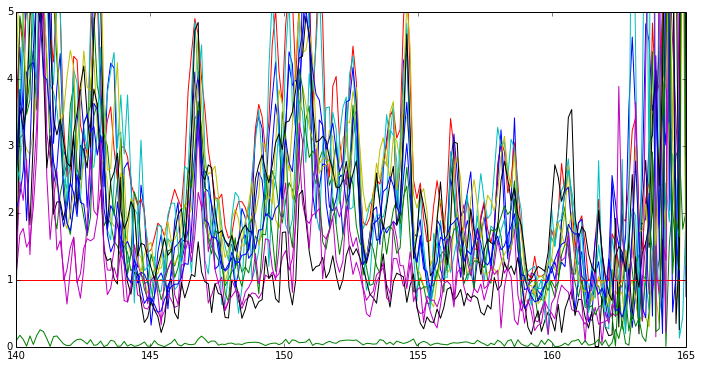

In [137]:
figure(figsize=(12,6))
for mmw in mmws:
    plot(mmw.mmw_freq/1e9,(np.abs(mmw.mmw_frac_response/mmws[9].mmw_frac_response)))
ylim(0,5)
#plot(mmw.mmw_freq/1e9,10*np.log10(mmw.zbd_voltage)-20,lw=2)

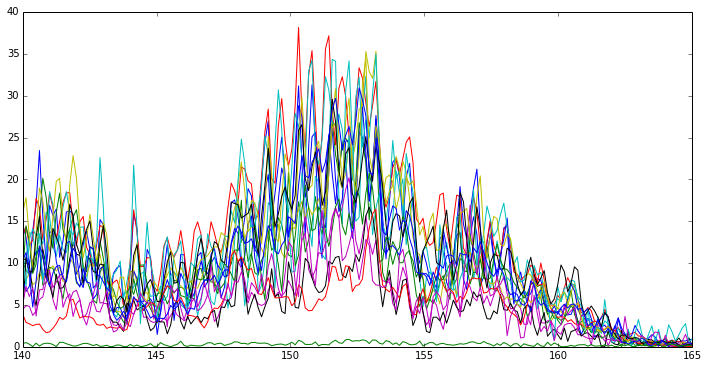

In [115]:
figure(figsize=(12,6))
for mmw in mmws:
    plot(mmw.mmw_freq/1e9,(np.abs(mmw.mmw_frac_response))*1e6)
#plot(mmw.mmw_freq/1e9,10*np.log10(mmw.zbd_voltage)-20,lw=2)

(0, 0.02)

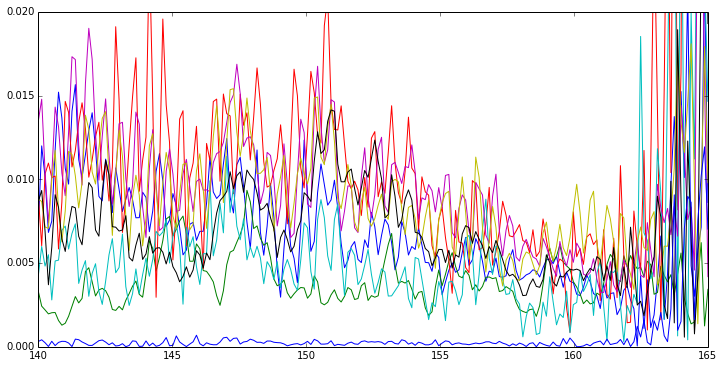

In [109]:
figure(figsize=(12,6))
for mmw in mmws[8:]:
    plot(mmw.mmw_freq/1e9,(np.abs(mmw.mmw_frac_response/mmw.zbd_voltage)))
#plot(mmw.mmw_freq/1e9,10*np.log10(mmw.zbd_voltage)-20,lw=2)
ylim(0,.02)

In [116]:
from kid_readout.analysis import resonator

In [117]:
resonators = [resonator.fit_best_resonator(mmw.sweep_freq,mmw.sweep_s21,errors=mmw.sweep_s21_error,min_a=1,delay_estimate=-31.3) for mmw in mmws]

In [119]:
[res.Q for res in resonators]

[4032.4000831882604,
 5994.3725842044696,
 8010.9019941640126,
 8713.8113936293466,
 9448.6380268376124,
 10449.418524043083,
 5174.6513873765216,
 9810.0215330855444,
 10597.92562861684,
 12259.899750786573,
 3319.0803487908438,
 4251.2556105090771,
 7783.3743273394321,
 9184.9916342473371,
 10561.65528004678,
 1710.5915325237011]

In [120]:
[res.Q_i for res in resonators]

[4170.2528148358124,
 6430.6862300812072,
 8592.9016877273643,
 9484.1734684836083,
 10270.036000289994,
 11786.038369561882,
 5373.0810871459853,
 10554.308019568311,
 11213.355143372715,
 14469.401961993115,
 3407.2841070874006,
 4391.5539667929006,
 8353.8970949486593,
 10433.347910269778,
 11144.593894625596,
 5697.8861176667433]

In [121]:
[res.Q_e_real for res in resonators]

[113521.02252043961,
 85364.900632364122,
 96079.275294543972,
 86898.8544569308,
 106598.87343786939,
 87595.967645164914,
 138587.43252130167,
 139071.98394707203,
 179709.31387721957,
 71909.347460776597,
 55256.052358155728,
 132872.21640660058,
 109054.02138757097,
 69637.886640888493,
 199423.19718204386,
 2322.3801733617265]

In [122]:
[res.Q_e_imag for res in resonators]

[-30999.565382186789,
 -15960.829996386543,
 -46181.103689416894,
 -42082.883583252202,
 -35071.328059279593,
 19952.711065227981,
 -14570.216370295617,
 2311.3285631897161,
 49052.007696278393,
 -24543.892825065879,
 -63493.515187316108,
 -5137.1164035327965,
 -23149.978611147148,
 22278.355656427681,
 -22301.815006584977,
 -532.44756240420975]

In [7]:
mmw.aligned_data.shape

(50, 256)

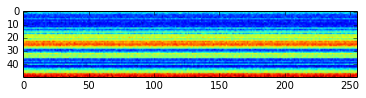

In [16]:
imshow(mmw.aligned_data.imag)

In [17]:
import kid_readout.utils.readoutnc

In [123]:
rnc = kid_readout.utils.readoutnc.ReadoutNetCDF('/data/readout/2016-01-08_151014_mmw_frequency_sweep.nc')

In [19]:
ts = rnc.timestreams[0]

In [20]:
ts.data.shape

(800, 65536)

In [50]:
ts2 = ts.data.reshape((800,-1,256))

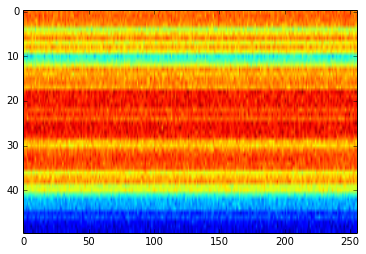

In [51]:
imshow(ts2[::16,:,:].mean(1).imag,aspect='auto')

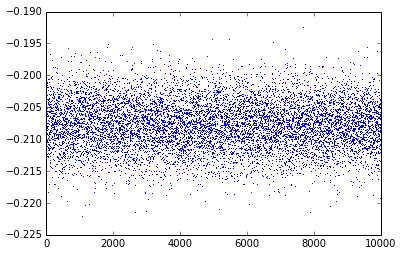

In [26]:
plot(ts.data[50,:10000].real,',')

In [124]:
swg = rnc.sweeps[0]

In [69]:
fr,s21,err = swg.select_by_index(7)

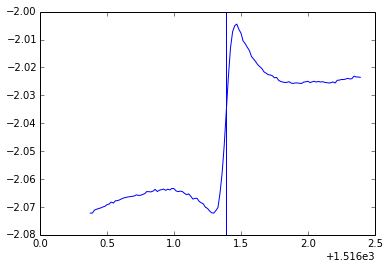

In [70]:
s21c = s21*np.exp(-31.298*2j*np.pi*fr)
plot(fr,np.angle(s21c))
gca().axvline(meas[7])

In [73]:
r7 = ts.data[7::16,:].T

In [74]:
r7.shape

(65536, 50)

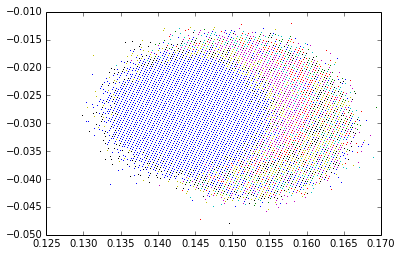

In [75]:
_ = plot(r7.real,r7.imag,',')

In [31]:
rnc.get_delay_estimate()

No delay estimate found for iq2xpfb14mcr7_2015_Nov_25_0907.bof, using 0 seconds


0

In [58]:
meas = ts.measurement_freq[:16]

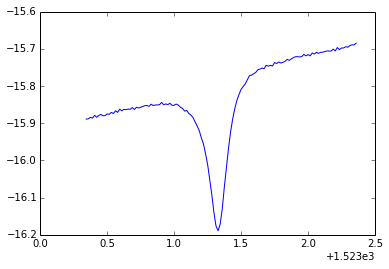

In [55]:
plot(fr,20*np.log10(np.abs(s21)))

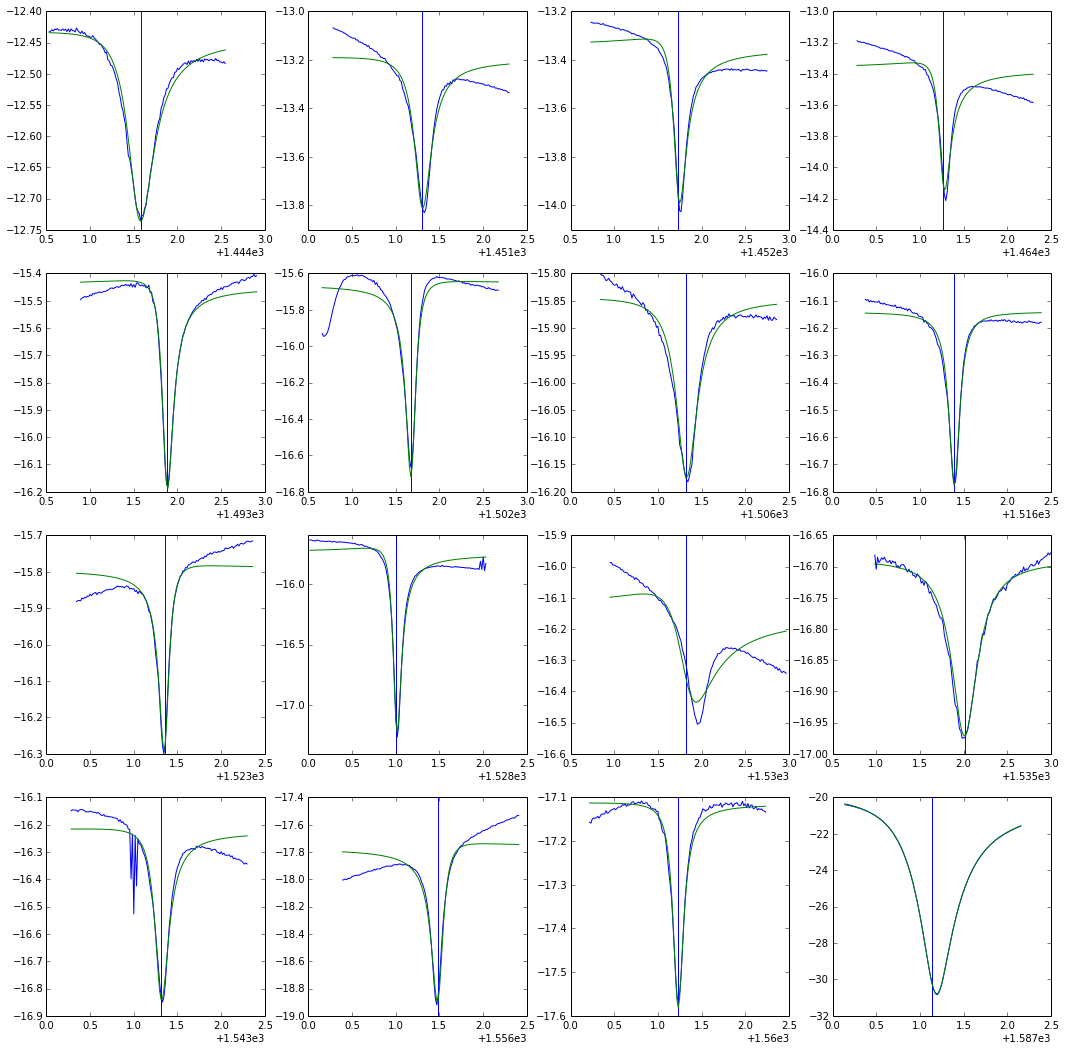

In [127]:
fig,axs = subplots(4,4,figsize=(18,18))
for k in range(16):
    ax = axs.flatten()[k]
    fr,s21,err = swg.select_by_index(k)
    ax.plot(fr,20*np.log10(np.abs(s21)))
    ax.axvline(meas[k])
    res = resonators[k]
    ax.plot(fr,20*np.log10(np.abs(res.model(x=fr))))

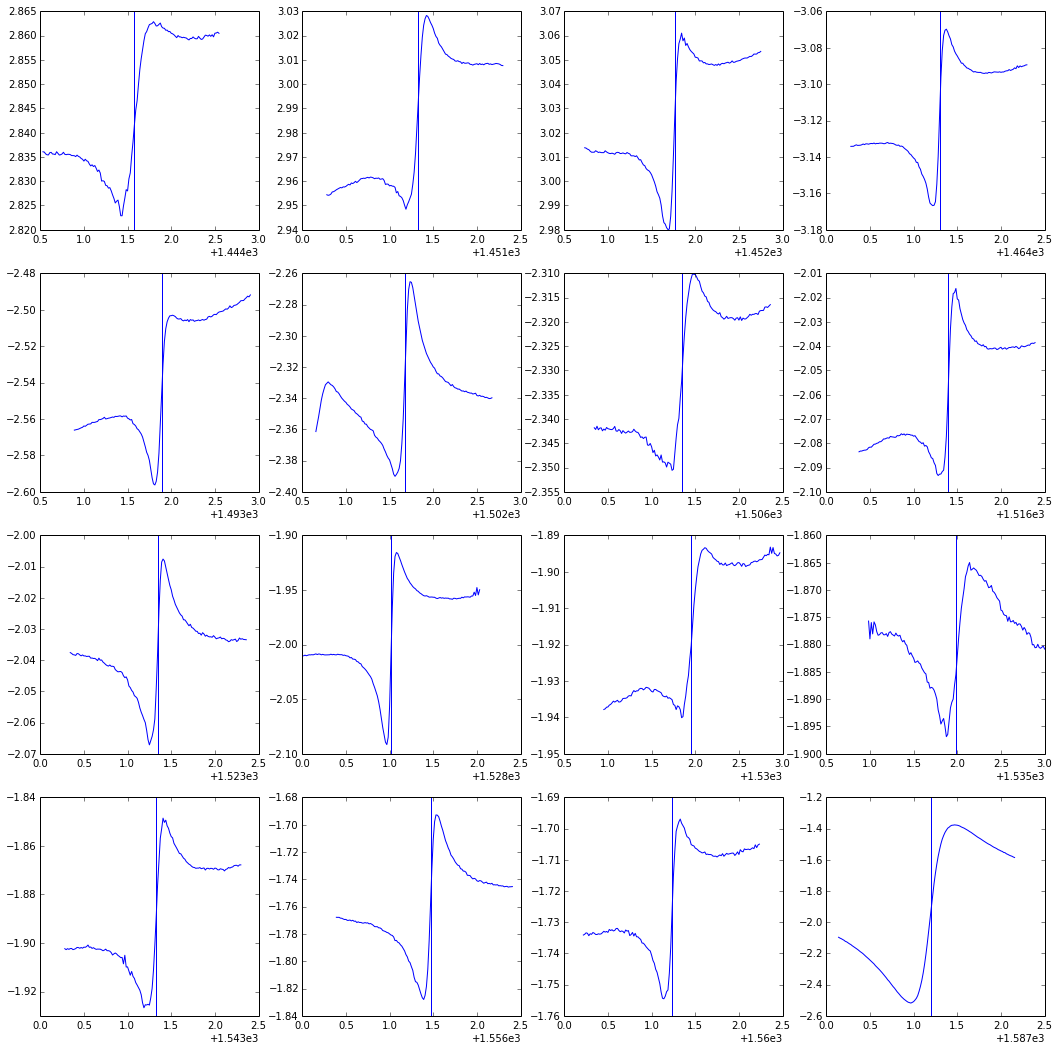

In [132]:
fig,axs = subplots(4,4,figsize=(18,18))
for k in range(16):
    ax = axs.flatten()[k]
    fr,s21,err = swg.select_by_index(k)
    s21c = s21*np.exp(-31.298*2j*np.pi*fr)
    ax.plot(fr,np.unwrap(np.angle(s21c)))
    #ax.axvline(meas[k])
    ax.axvline(fr[np.abs(s21).argmin()])
#    ax.plot(fr,20*np.log10(np.abs(res.model(x=fr))))

In [128]:
meas

array([ 1445.578125,  1452.296875,  1453.734375,  1465.265625,
        1494.875   ,  1503.671875,  1507.328125,  1517.390625,
        1524.359375,  1529.      ,  1531.828125,  1537.015625,
        1544.3125  ,  1557.484375,  1561.234375,  1588.140625])

In [129]:
np.save('/home/gjones/2016-01-08-resonances.npy',meas)